In [45]:
import math
import numpy as np

In [128]:
np.set_printoptions(precision = 3)

In [180]:
def integrate(f,a,b,n=1e6):
    step = (b-a)/n
    x = np.arange(a,b,step)
    y = f(x)
    return np.sum(y*step)

def func_inner_prod(f,g):
    return integrate(lambda x: f(x) * g(x),-1*math.pi,math.pi)

In [186]:
class Polynomial:
    def __init__(self,coeffs):
        self.coeffs = coeffs
        self.deg = len(coeffs) - 1

    def __call__(self,x):
        sum = 0
        cur = 1
        for i in range(self.deg + 1):
            sum += self.coeffs[i] * cur
            cur *= x
        return sum

    def __add__(self,other):
        n = self.deg
        m = other.deg

        k = max(n,m)

        new_coeffs = np.zeros(k + 1)

        for i in range(n+1):
            new_coeffs[i] += self.coeffs[i]
        for i in range(m+1):
            new_coeffs[i] += other.coeffs[i]

        return Polynomial(new_coeffs)

    def __rmul__(self,other):
        p = Polynomial(other * self.coeffs)
        return p

    def __str__(self):
        s = ""
        for i in range(self.deg + 1):
            if self.coeffs[i] == 0:
                continue

            if self.coeffs[i] == 1:
                if i == 0:
                    s += "1"
                elif i == 1:
                    s += "x"
                else:
                    s += "x^" + str(i)
            else:
                if i == 0:
                    s += str(self.coeffs[0])
                elif i == 1:
                    s += str(self.coeffs[1]) + "x"
                else:
                    s += str(self.coeffs[i]) + "x^" + str(i)

            s += " + "
        return s[:-2]

In [76]:
class Vector:
    def __init__(self,v):
        self.v = v

    def __add__(self,other):
        return Vector(self.v + other.v)

    def __rmul__(self,other):
        return Vector(other * self.v)

In [64]:
f = Vector(Polynomial(np.array([3,0,-2,1])))
g = Vector(Polynomial(np.array([1,0,1])))
print(2 * f)

6 + -4x^2 + 2x^3 


In [188]:
def gram_schmidt(B,inner_prod):
    E = [1/math.sqrt(inner_prod(B[0].v,B[0].v)) * B[0]]

    for i in range(1,len(B)):
        v_orthogonal = B[i]
        for j in range(i):
            v_orthogonal = v_orthogonal + -1 * inner_prod(B[i].v,E[j].v) * E[j]

        v_orthonormal = 1/math.sqrt(inner_prod(v_orthogonal.v,v_orthogonal.v)) * v_orthogonal

        E.append(v_orthonormal)

    return E


In [189]:
n = 6
B = [Vector(Polynomial(np.eye(n)[i])) for i in range(n)]
E = gram_schmidt(B,func_inner_prod)
for p in E:
    print(p.v)

0.39894228040143265 
6.909910768804662e-07 + 0.21994840679176692x 
-0.4460310290375236 + 8.518599411603342e-07x + 0.13557717541150793x^2 
-1.5832594572456425e-06 + -0.5039651115536854x + 8.020886110800145e-07x^2 + 0.08510390269641208x^3 
0.4488100654493678 + -2.857225104697166e-06x + -0.4547396706268478x^2 + 6.75494002145017e-07x^3 + 0.053753888624253614x^4 
2.480900956835907e-06 + 0.7896921261366193x + -3.5191495008308503e-06x^2 + -0.373391857696231x^3 + 5.348465892211138e-07x^4 + 0.03404925448659264x^5 


In [190]:
p = Polynomial([0])
for i in range(n):
    p = p + func_inner_prod(np.sin,E[i].v) * E[i].v
print(p)

2.995754464220193e-08 + 0.9878621355749128x + -4.249467488644419e-08x^2 + -0.15527141063360128x^3 + 6.4584161779247276e-09x^4 + 0.005643117976369065x^5 


In [162]:
from plotnine import *
import pandas as pd

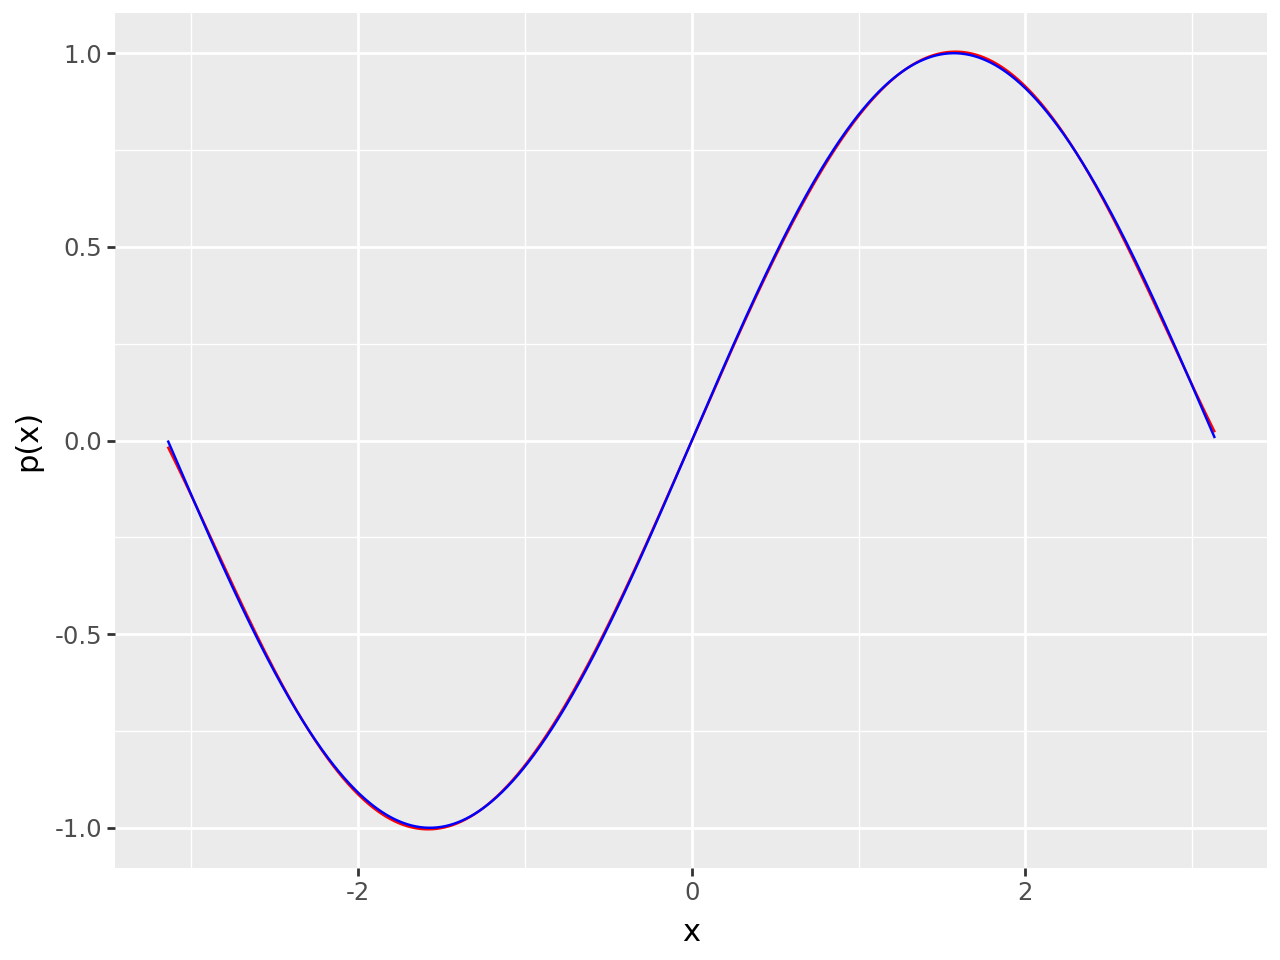

In [192]:
x = np.arange(-math.pi,math.pi,2*math.pi/1000)
y1 = p(x)
y2 = np.sin(x)

df = pd.DataFrame({"x": x, "p(x)": y1, "sin(x)": y2})

ggplot(df) + geom_line(aes(x = "x", y= "p(x)"), color = "red") + geom_line(aes(x = "x", y= "sin(x)"), color = "blue")